In [1]:
using Pkg
Pkg.add("JuMP")
Pkg.add("PowerModels")
Pkg.add("Ipopt")
Pkg.add("GLPK")
Pkg.add("DataFrames")


   Resolving package versions...
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Manifest.toml`


In [21]:
include("C:/Users/mansi/Dropbox/6.7201_optimization_methods/Project/ac-opf.jl")


[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 4 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 4 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 1 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 1 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 5 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 5 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 2 from -360.0 to -60.0 deg.
[warn

In [22]:
using Plots
using DataFrames
# Extract solution values
vm_values = value.(vm)
va_values = value.(va)
pg_values = value.(pg)
p_values = value.(p)
q_values = value.(q)
p_dc_values = value.(p_dc)

1-dimensional DenseAxisArray{Any,1,...} with index sets:
    Dimension 1, Tuple{Int64, Any, Any}[]
And data, a 0-element Vector{Any}

In [23]:
# Extract indices from DenseAxisArray
bus_indices = collect(axes(vm_values)[1])
gen_indices = collect(axes(pg_values)[1]);
branch_indices = collect(axes(p_values)[1])

12-element Vector{Tuple{Int64, Int64, Int64}}:
 (5, 3, 4)
 (4, 2, 3)
 (6, 4, 5)
 (2, 1, 4)
 (3, 1, 5)
 (1, 1, 2)
 (5, 4, 3)
 (4, 3, 2)
 (6, 5, 4)
 (2, 4, 1)
 (3, 5, 1)
 (1, 2, 1)

In [24]:
VM = zeros(length(bus_indices));
for i = 1:length(bus_indices)
VM[bus_indices[i]]  = vm_values[bus_indices[i]]
end
    
VA = zeros(length(bus_indices));
for i = 1:length(bus_indices)
VA[bus_indices[i]]  = va_values[bus_indices[i]]
end

PG = zeros(length(gen_indices));
for i = 1:length(gen_indices)
PG[gen_indices[i]]  = pg_values[gen_indices[i]]
end

PB = zeros(length(branch_indices));
for i = 1:length(branch_indices)
PB[i]  = p_values[branch_indices[i]]
end

QB = zeros(length(branch_indices));
for i = 1:length(branch_indices)
QB[i]  = q_values[branch_indices[i]]
end

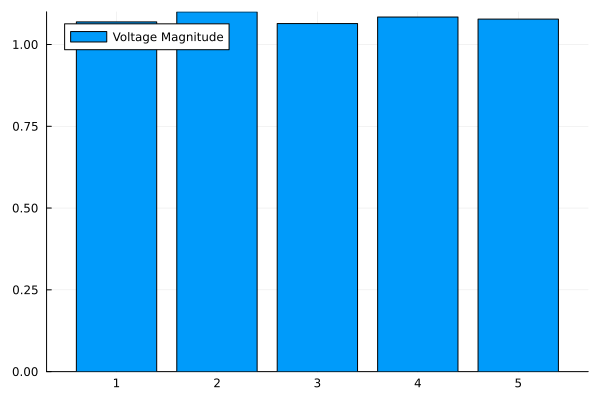

In [25]:
# Plot Voltage Profile
plot(title="Voltage Magnitude Profile", xlabel="Bus", ylabel="Voltage Magnitude (pu)")
bar(bus_indices, VM, label="Voltage Magnitude", legend=:topleft)

In [26]:
# Create a DataFrame
df = DataFrame( Voltage_Magnitude = VM, Voltage_Angle = VA)
# Display the DataFrame
display(df)

Row,Voltage_Magnitude,Voltage_Angle
,Float64,Float64
1,1.07762,0.0489352
2,1.08406,-0.012822
3,1.1,-0.00976905
4,1.06414,4.06597e-35
5,1.06907,0.0626634


In [27]:
# Create a DataFrame
df = DataFrame(Active_Power = PG*ref[:baseMVA])
# Display the DataFrame
display(df)

Row,Active_Power
,Float64
1,40.0
2,170.0
3,324.498
4,-6.51851e-7
5,470.694


In [28]:
# Create a DataFrame
df = DataFrame(branch = branch_indices,Active_Power_flow = PB*ref[:baseMVA],Reactive_Power_flow = QB*ref[:baseMVA])
# Display the DataFrame
display(df)

Row,branch,Active_Power_flow,Reactive_Power_flow
,Tuple…,Float64,Float64
1,"(5, 3, 4)",-24.9508,135.1
2,"(4, 2, 3)",-49.2064,-156.068
3,"(6, 4, 5)",-238.502,13.3104
4,"(2, 1, 4)",187.869,33.1319
5,"(3, 1, 5)",-230.246,166.818
6,"(1, 1, 2)",252.378,-42.45
7,"(5, 4, 3)",25.4168,-131.23
8,"(4, 3, 2)",49.4493,156.29
9,"(6, 5, 4)",239.998,0.891135


In [ ]:
# Plot Voltage Profile
plot(title="Voltage Magnitude Profile", xlabel="Bus", ylabel="Voltage Magnitude (pu)")
bar(bus_indices, VA, label="Voltage Angle", legend=:topleft)